In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.cort_processor import *

from src.plotter import *
from src.filters import *
import math
import pickle
import scipy
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import cm
from scipy import signal
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from matplotlib import colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import tdt 
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, iirnotch, filtfilt, resample, hilbert, welch
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
from scipy.io import savemat

In [3]:
rollie1129 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie/1129')
rollie1129.process()

read from t=0s to t=371.88s
read from t=0s to t=352.3s


(array([[ 20.,  80.,  20., ...,  40.,  20.,  20.],
        [ 20.,  40.,   0., ...,  20.,  20.,  60.],
        [  0.,  40.,  40., ..., 140.,  20.,  40.],
        ...,
        [ 20.,   0.,   0., ...,  20.,  20.,   0.],
        [ 40.,  40.,   0., ...,  20.,  40.,  80.],
        [  0.,  40.,   0., ...,  20.,   0.,   0.]]),
 array([[167.48464387,  63.85915525,  85.57627118, ...,  61.62516639,
          82.02233546, 160.45151816],
        [162.68903079,  67.16539274,  79.07084519, ...,  59.99230052,
          76.71208209, 165.0244428 ],
        [163.31619854,  55.54741612,  84.60433203, ...,  64.38591679,
          82.54450781, 163.78877682],
        ...,
        [147.91989055,  54.29923447, 103.29290928, ...,  74.90590892,
          96.67447058, 159.89321414],
        [144.20502153,  54.43811062, 104.45613898, ...,  75.77255941,
          98.28704118, 158.96151146],
        [142.76760199,  54.96163038, 106.93983068, ...,  76.36840837,
         106.24960909, 164.28462118]]))

In [4]:
r2_1129, test_arctans_1129, test_phase_1129, _, _, _, _, _ = rollie1129.decode_phase()

In [5]:
rollie1209 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie/1209')
rollie1209.process()

read from t=0s to t=327.92s
read from t=0s to t=237.33s
read from t=0s to t=184.62s


(array([[ 40., 140.,  20., ..., 100.,  60.,  80.],
        [  0., 120.,   0., ...,  20.,  60.,  40.],
        [ 20.,  60.,  20., ...,   0.,   0.,  20.],
        ...,
        [  0.,   0., 100., ...,   0.,   0.,  20.],
        [ 20.,  40.,  40., ...,  20.,   0.,   0.],
        [ 60.,  40.,   0., ...,  20.,   0.,   0.]]),
 array([[139.71233495,  46.34049354, 105.21713   , ...,  77.90241092,
          77.42988387, 135.21609212],
        [145.34645341,  43.35477217, 107.14311525, ...,  78.81609535,
          66.54702068, 110.59363493],
        [142.81152867,  43.73290348, 106.10764914, ...,  87.40366439,
          67.71379361, 112.04275624],
        ...,
        [160.64578834,  48.2641632 , 103.63358822, ..., 106.50083528,
          68.82975072, 105.78564332],
        [163.86043802,  52.47052865,  96.06072894, ..., 115.07670079,
          70.63218898, 103.00192999],
        [166.57685486,  77.41210747,  91.99311747, ...,  98.65296947,
          69.0261878 , 103.34361708]]))

In [7]:
r2_1209, test_arctans_1209, test_phase_1209, _, _, _, _, _ = rollie1209.decode_phase()

In [8]:
rollie1216 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie/1216')
rollie1216.process()

read from t=0s to t=345.41s
read from t=0s to t=360.07s


(array([[ 60.,  20.,  60., ...,  40.,  60.,  60.],
        [ 60., 100., 100., ...,  20.,  40., 120.],
        [ 40., 120.,  80., ...,  40.,   0., 120.],
        ...,
        [ 40.,  20.,   0., ...,  60.,  20.,  20.],
        [  0.,  40.,  60., ...,   0.,   0.,  20.],
        [ 20.,  20.,  40., ...,  20.,  40.,  40.]]),
 array([[165.04212637,  62.05968537,  68.01284291, ...,  88.44347268,
          77.77221799, 125.00880864],
        [160.80700108,  76.4108133 ,  68.46222572, ..., 115.92204272,
          68.26463126,  97.59397445],
        [165.82847801,  90.56513028,  68.26985874, ..., 113.70652281,
          71.22853429,  98.90918859],
        ...,
        [161.89538783,  58.82980113,  63.46532531, ...,  56.20058932,
          90.54743637, 170.73173551],
        [157.370791  ,  53.93712258,  65.16367026, ...,  54.73827367,
          87.52572024, 171.54052801],
        [151.05325149,  48.35280331,  65.28979724, ...,  55.52980295,
          77.94177814, 150.82884125]]))

In [9]:
r2_1216, test_arctans_1216, test_phase_1216, _, _, _, _, _ = rollie1216.decode_phase()

In [10]:
rollie1220 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie/1220')
rollie1220.process()

read from t=0s to t=342.9s
read from t=0s to t=374.4s


(array([[ 80.,  60., 140., ...,  60.,  60.,  40.],
        [ 40.,  60.,  20., ...,  60., 120.,  80.],
        [  0.,  40.,  20., ...,  40., 100.,  60.],
        ...,
        [ 20.,  40.,   0., ...,   0.,  20.,   0.],
        [  0.,   0.,  20., ...,   0.,   0.,  20.],
        [120.,   0., 100., ...,   0., 100.,  40.]]),
 array([[155.18008942,  62.31714595, 124.58387345, ...,  39.84568486,
         123.52170626, 146.73617002],
        [144.70160036,  64.46756092, 171.69413784, ...,  16.29213078,
         151.63924658, 140.44733846],
        [142.00795507,  57.59573013, 147.14232081, ...,  22.70757773,
         145.95248501, 139.58505765],
        ...,
        [158.12726101,  76.46171251,  96.31090285, ..., 104.91160728,
          90.27138438, 125.4602608 ],
        [162.82654766,  86.69692307,  97.59230142, ...,  91.3241497 ,
          87.43559725, 130.96974981],
        [163.71225636,  87.92152975,  92.2227918 , ...,  83.59751062,
          97.35160338, 160.5808409 ]]))

In [24]:
r2_1220, test_arctans_1220, test_phase_1220, _, _, _, H_sin_1220, _ = rollie1220.decode_phase()

In [12]:
morbo1101 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/morbo1101')
morbo1101.process()

read from t=0s to t=339.5s
read from t=0s to t=341.15s
read from t=0s to t=261.62s


(array([[ 0.,  0., 20., ...,  0., 20.,  0.],
        [20.,  0., 20., ..., 40., 20., 20.],
        [20., 20., 20., ..., 20., 40.,  0.],
        ...,
        [20., 40.,  0., ..., 40., 60.,  0.],
        [ 0.,  0.,  0., ...,  0., 20.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[124.07356073, 117.61060638,  68.90063065, ..., 148.9697519 ,
         112.97915264, 131.62872692],
        [103.28817058, 162.25930834,  66.38986122, ..., 160.24151976,
          84.13709795, 104.65441538],
        [119.89011595, 151.95560136,  74.01746214, ..., 163.13699287,
          92.0517567 , 109.08478231],
        ...,
        [174.25763527,  79.21409429,  66.0450305 , ..., 126.03381644,
         137.16740259, 172.0077332 ],
        [169.47726242,  68.03192305,  68.24421978, ..., 131.20056386,
         134.60692845, 164.85959337],
        [161.75509448,  58.00369267,  67.90018574, ..., 137.6231556 ,
         124.66871599, 151.14402449]]))

In [13]:
r2, test_arctans, test_phase, test_rates, full_rates, full_phase_list, h_sin, h_cos = morbo1101.decode_phase()

In [14]:
print(r2_1129)
print(r2_1209)
print(r2_1216)
print(r2_1220)

print(r2)


[0.17177101992688576, 0.4319570972513953, 0.2756484882827918, 0.3094912463682839, 0.20543848600849862, 0.28137318898112806, 0.23131339643729548, 0.32407327965743893]
[0.27242079020156235, 0.4709095868780645, 0.254353767466119, 0.34042100429910677, 0.20545638663381244, 0.2977195202459538, 0.17026437233434488, 0.24213756442952628]
[0.38624593441961635, 0.6264503987488461, 0.23269400810468543, 0.48219526976583815, 0.40551341744910396, 0.499760974966428, 0.3368994238064291, 0.4989531517195181]
[0.13479733802000204, 0.6355087575051178, 0.41015773427859087, 0.40098096557213037, 0.4060536016178069, 0.5176767340623202, 0.27774828358816084, 0.46077574058146165]
[0.1311556845282868, 0.26572005441351365, 0.05296691340904486, 0.1405593197395289, 0.09196757676488171, 0.1545326844231933, 0.19195063406951396, 0.21354436189166792]


In [16]:
print(rollie1216.data['angle_names'])
print(morbo1101.data['angle_names'])

['foot', 'knee', 'hip', 'limbfoot', 'hand', 'elbow', 'shoulder', 'forelimb']
['foot', 'knee', 'hip', 'limbfoot', 'hand', 'elbow', 'shoulder', 'forelimb']


array([[-0.05905645, -0.05941741, -0.05973582, -0.05971739, -0.05970991,
        -0.05957963, -0.05937517, -0.05926002, -0.05940678, -0.05938328,
        -0.05946419, -0.05946419, -0.05946419],
       [-0.05809186, -0.05868653, -0.0591204 , -0.05949513, -0.05955051,
        -0.05945298, -0.05925931, -0.05906476, -0.05920919, -0.05926445,
        -0.05911951, -0.05911951, -0.05911951],
       [-0.05738007, -0.0580026 , -0.0587206 , -0.05945385, -0.06007036,
        -0.06060317, -0.0607791 , -0.06058069, -0.05989902, -0.05916277,
        -0.05946522, -0.05946522, -0.05946522],
       [-0.0596226 , -0.05924163, -0.05910305, -0.05895256, -0.05894404,
        -0.05903523, -0.05902903, -0.05901537, -0.05914359, -0.05923784,
        -0.05913249, -0.05913249, -0.05913249],
       [-0.05871721, -0.05873598, -0.05897744, -0.05928337, -0.05949656,
        -0.05968076, -0.05981601, -0.05978651, -0.05953343, -0.05926991,
        -0.05932972, -0.05932972, -0.05932972],
       [-0.05902677, -0.059022

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
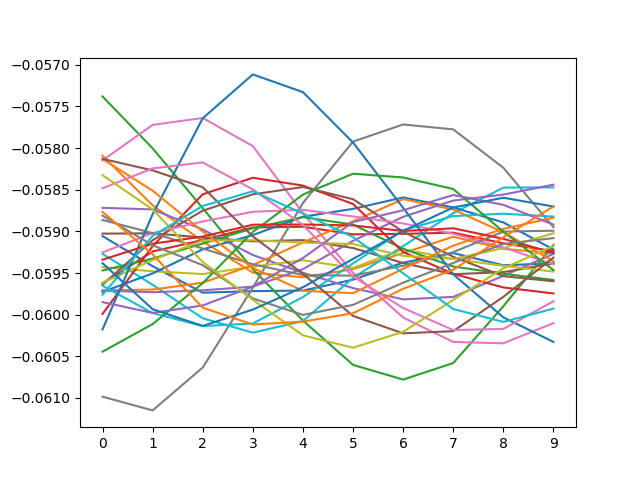

In [31]:
morbo1101.impulse_response(AOI = 1, H = 'sin')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
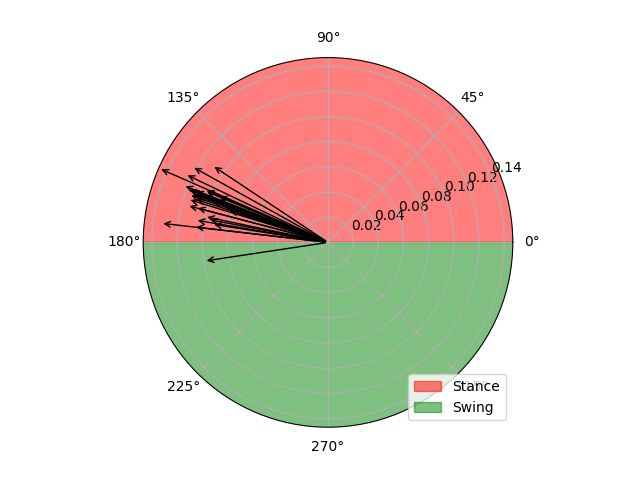

In [32]:
# _, _ = morbo1101.DOM(angle_name = 'limbfoot')
_, _ = morbo1101.DOM(angle_name = 'knee')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
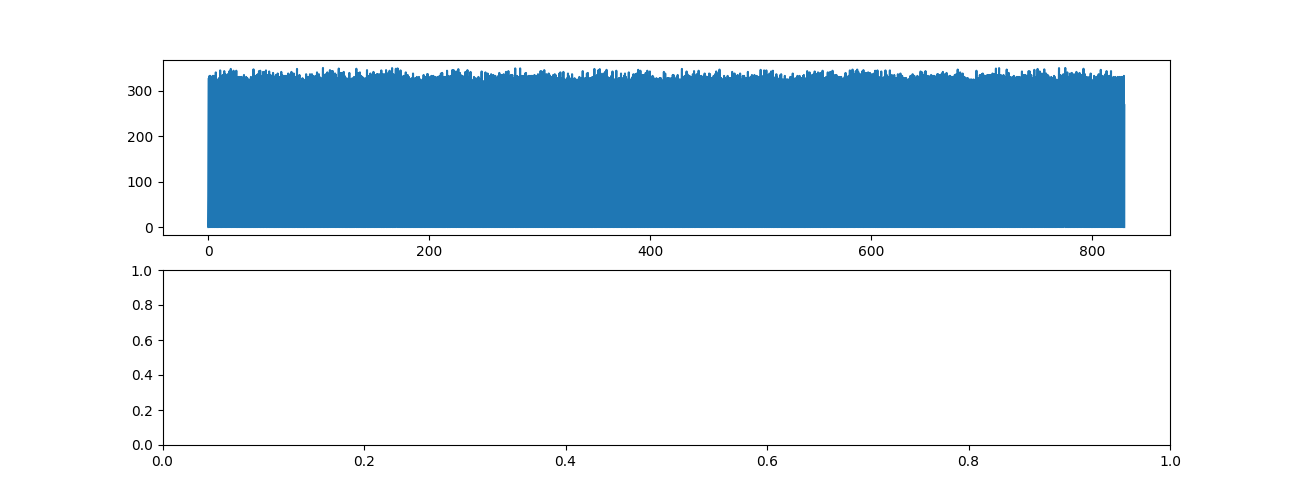

In [174]:
tsf = np.linspace(0, (full_phase_list.shape[0]*50)/1000,full_phase_list.shape[0])
fig0, ax = plt.subplots(2,1, figsize=(13,5),sharex = True)
ax[0].plot(tsf, full_phase_list[:,1])



Text(0.5, 0, 'time (s)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
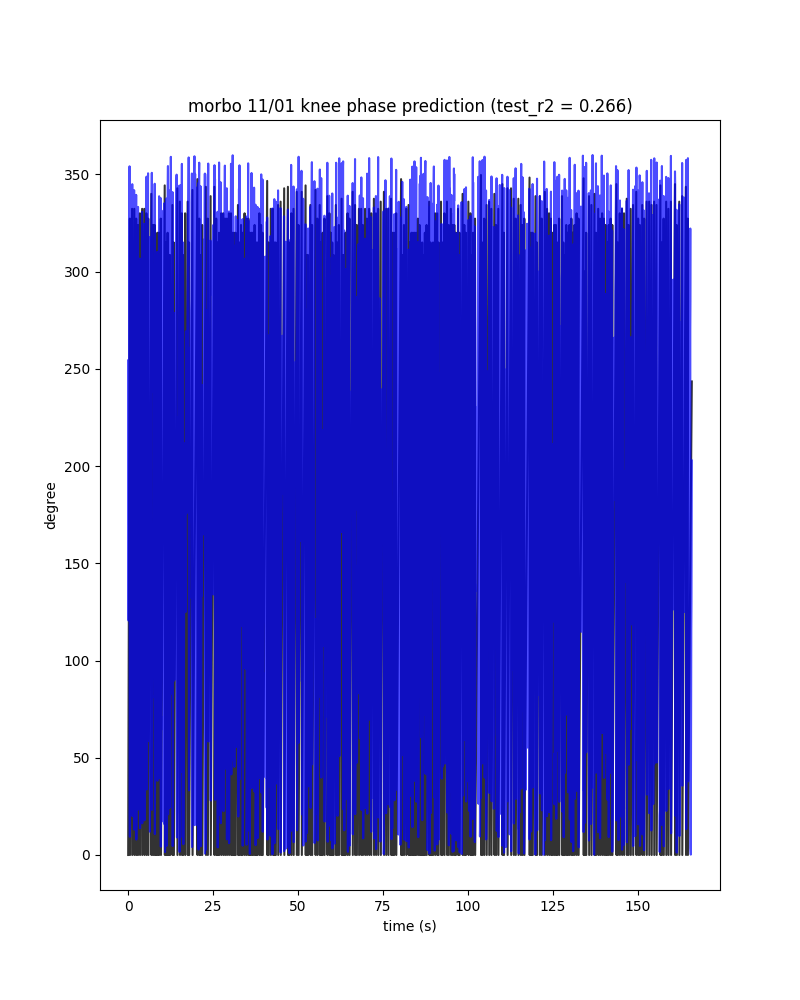

In [34]:
tstt = np.linspace(0, (test_phase.shape[0]*50)/1000,test_phase.shape[0])
fig, axs = plt.subplots(1, 1, figsize=(8,10), sharex= True)
axs.set_title('morbo 11/01 knee phase prediction (test_r2 = 0.266)')
axs.plot(tstt, test_phase[:,1], c='black', alpha = 0.8)
axs.plot(tstt, test_arctans[:,1], c='blue', alpha = 0.7)
axs.set_ylabel('degree')
axs.set_xlabel('time (s)')


Text(0.5, 0, 'time (s)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
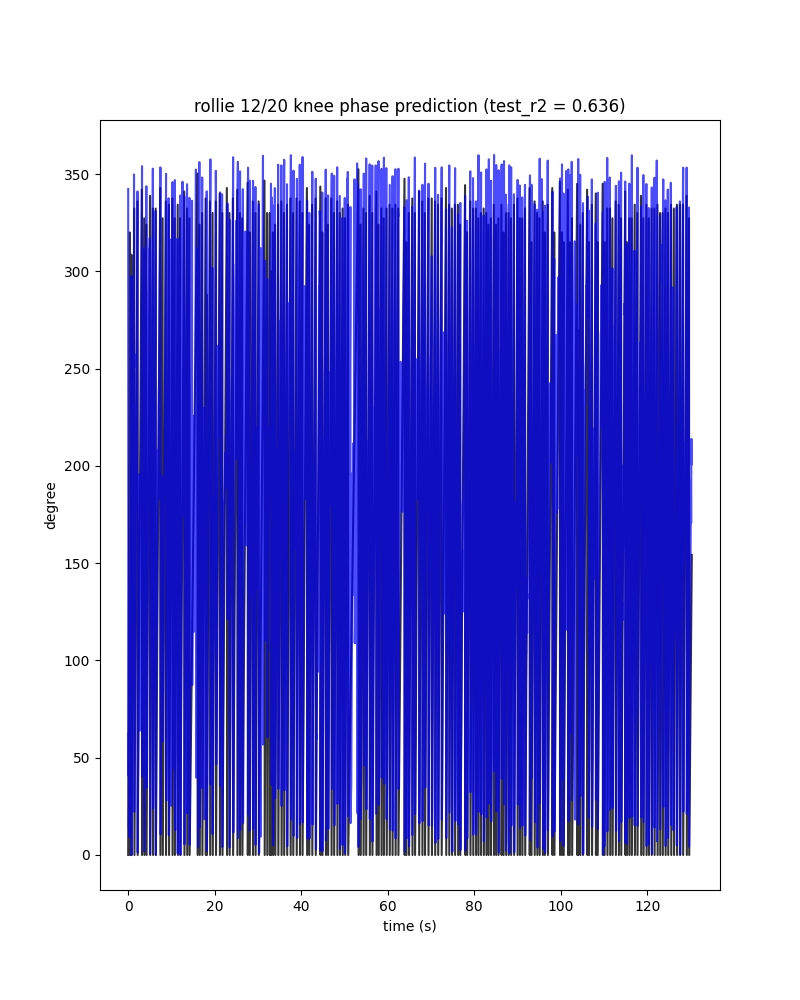

In [38]:
tst = np.linspace(0, (test_phase_1220.shape[0]*50)/1000,test_phase_1220.shape[0])
fig, axs = plt.subplots(1, 1, figsize=(8,10), sharex= True)
axs.set_title('rollie 12/20 knee phase prediction (test_r2 = 0.636)')
axs.plot(tst, test_phase_1220[:,1], c='black', alpha = 0.8)
axs.plot(tst, test_arctans_1220[:,1], c='blue', alpha = 0.7)
axs.set_ylabel('degree')
axs.set_xlabel('time (s)')

# tstt = np.linspace(0, (test_phase.shape[0]*50)/1000,test_phase.shape[0])
# axs[1].set_title('morbo 11/01 knee phase prediction (test_r2 = 0.266)')
# axs[1].plot(tstt, test_phase[:,1], c='black', alpha = 0.8)
# axs[1].plot(tstt, test_arctans[:,1], c='blue', alpha = 0.7)
# axs[1].set_ylabel('degree')
# axs[1].set_xlabel('time (s)')


# axs[1].set_title('1101 knee phase (variable speed, r = 0.27')
# axs[1].plot(tsf_1101, act_1101[:,1], c='black', alpha = 0.8)
# axs[1].plot(tsf_1101, pred_1101[:,1], c='blue', linestyle = '--', alpha = 0.7)

array([[-0.08787113, -0.08800908, -0.08808502, -0.08802673, -0.08802808,
        -0.08802302, -0.08810536, -0.08814728, -0.08810358, -0.08809312,
        -0.08804924, -0.08804924, -0.08804924, -0.08804924, -0.08804924],
       [-0.08892404, -0.08866757, -0.08820639, -0.08775412, -0.08739063,
        -0.08725581, -0.08719136, -0.08728251, -0.08759557, -0.08795525,
        -0.08782232, -0.08782232, -0.08782232, -0.08782232, -0.08782232],
       [-0.08833892, -0.08822295, -0.08821017, -0.08822643, -0.08812443,
        -0.0880568 , -0.08791533, -0.08774033, -0.08752617, -0.08732493,
        -0.08796865, -0.08796865, -0.08796865, -0.08796865, -0.08796865],
       [-0.08872417, -0.08814131, -0.08764956, -0.08729949, -0.08716001,
        -0.08715338, -0.08725914, -0.08744633, -0.08745273, -0.08769946,
        -0.08759856, -0.08759856, -0.08759856, -0.08759856, -0.08759856],
       [-0.08865928, -0.08820681, -0.08771477, -0.08738522, -0.08725305,
        -0.08723563, -0.08733337, -0.08747617, 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
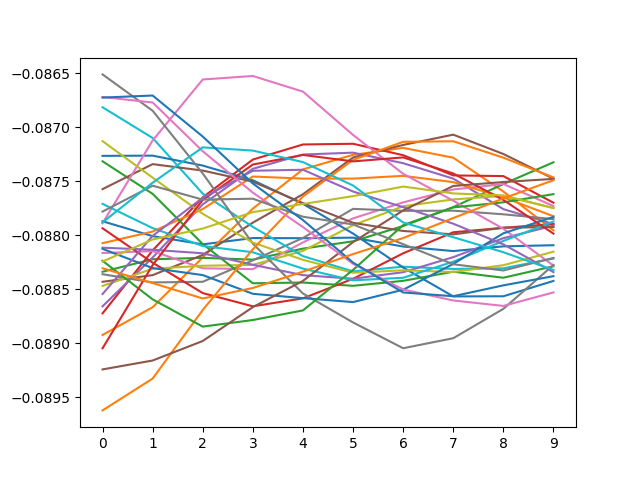

In [28]:
rollie1220.impulse_response(AOI = 1, H = 'sin')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
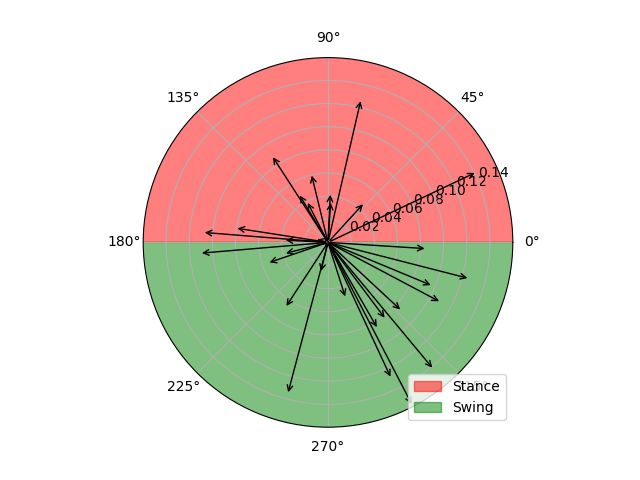

In [29]:
_, _ = rollie1220.DOM(angle_name = 'knee')